In [ ]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-06 18:21:33


In [ ]:
! pip install sklearn
! pip install keras-tuner
! pip install pytorch-tabnet
! pip install torchvision
! pip install transformers
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d5006120957c1b9a798bd4e6e8f48036d506ae95b1cace7d9893eae94437d0ac
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 28.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 604 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
fname = f"/content/drive/MyDrive/NUS/Y4S1/BT4222 (1)/data/feature_eng_combined_v2.csv"

df = pd.read_csv(fname)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,name,artists,artist_ids,track_number,danceability,energy,key,loudness,...,rock,soft rock,southern hip hop,trap,urban contemporary,release_date,release_month,average_year_success,is_success,bert_dense_lyrics
0,0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],['4dpARuHxo51G3z768sgnrY'],1,0.604,0.366,5,-7.519,...,0,0,0,0,0,14/10/21,2021-10,38,1,0.677761
1,1,4BI4iNZigfF4SUq13TcFPh,INDUSTRY BABY - EXTENDED,"['Lil Nas X', 'Jack Harlow']","['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...",2,0.732,0.708,10,-6.775,...,0,0,0,0,0,9/10/21,2021-10,27,1,0.587171
2,2,58UKC45GPNTflCN6nwCUeF,Fancy Like,['Walker Hayes'],['7sKxqpSqbIzphAKAhrqvlf'],6,0.647,0.765,1,-6.459,...,0,0,0,0,0,21/1/22,2022-01,12,1,0.616422
3,3,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],4,0.807,0.893,11,-3.745,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.596769
4,4,50nfwKoDiSYg8zOCREWAm5,Shivers,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2,0.788,0.859,2,-2.724,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.640173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56830,56830,4lCAS06lKCJiFVGhHqxCtW,Talk About It,['A Boogie Wit da Hoodie'],['31W5EY0aAly4Qieq6OFu6I'],9,0.445,0.584,1,-9.666,...,0,0,0,1,0,18/6/20,2020-06,64,1,0.597523
56831,56831,60xDmDoYJytWs5do9aHI0F,Beat the Odds,['Money Man'],['3Rx4PJ7SP6unkOk5elPUK7'],8,0.787,0.590,10,-7.123,...,0,0,1,1,0,20/3/20,2020-03,-1,0,0.596241
56832,56832,6bAHtwPD7MBjSD8UmZFsh8,Geography,"['Chaos Chaos', 'Kevin Hickey', 'Lucas McCross...","['6D6rjLdxyE5vwhMlkuQq0E', '12Cqmjoj96GR0wFIup...",1,0.522,0.788,10,-5.926,...,0,0,0,0,0,21/2/20,2020-02,-1,0,0.652086
56833,56833,0G9CL2p0TP4kTIXroDR326,twin hearts (feat. YURMS),"['ITSOKTOCRY', 'Yurms']","['2BUUAEl4BwFRA9NBDgMWSf', '2IaEQEZ606L3nZuGnm...",6,0.786,0.609,11,-6.139,...,0,0,0,0,0,6/11/20,2020-11,-1,0,0.560518


In [ ]:
from sklearn.model_selection import train_test_split

#Feature selection for training
print(df.columns)
df_model = df.copy().drop(columns=['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'release_date_x', 'release_date', 'date', 'lyrics', 'non_stop_lyrics', 'release_month', 'sentiment'])

#Split train and test set
X, y = df_model.drop(columns=['target']), df_model['target']


Index(['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'track_number',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'explicit', 'duration_ms', 'date', 'release_date_x', 'lyrics', 'target',
       'length_lyrics', 'unique_length_lyrics', 'title_length',
       'non_stop_lyrics', 'length_lyrics_non', 'unique_length_lyrics_non',
       'sentiment', 'positive', 'neutral', 'negative', 'compound',
       'alternative rock', 'country', 'country rock', 'dance pop', 'folk',
       'gangster rap', 'hip hop', 'indie rock', 'mellow gold', 'pop',
       'pop rap', 'pop rock', 'post-teen pop', 'r&b', 'rap', 'rock',
       'soft rock', 'southern hip hop', 'trap', 'urban contemporary',
       'release_date', 'release_month', 'average_year_success', 'is_success',
       'bert_dense_lyrics'],
      dtype='object')


In [ ]:
X.columns

Index(['track_number', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'explicit', 'duration_ms', 'length_lyrics',
       'unique_length_lyrics', 'title_length', 'length_lyrics_non',
       'unique_length_lyrics_non', 'positive', 'neutral', 'negative',
       'compound', 'alternative rock', 'country', 'country rock', 'dance pop',
       'folk', 'gangster rap', 'hip hop', 'indie rock', 'mellow gold', 'pop',
       'pop rap', 'pop rock', 'post-teen pop', 'r&b', 'rap', 'rock',
       'soft rock', 'southern hip hop', 'trap', 'urban contemporary',
       'average_year_success', 'is_success', 'bert_dense_lyrics'],
      dtype='object')

In [ ]:
X.dtypes

track_number                  int64
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
explicit                       bool
duration_ms                   int64
length_lyrics                 int64
unique_length_lyrics          int64
title_length                  int64
length_lyrics_non             int64
unique_length_lyrics_non      int64
positive                    float64
neutral                     float64
negative                    float64
compound                    float64
alternative rock              int64
country                       int64
country rock                  int64
dance pop                     int64
folk                        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

MinMax Scaler


---



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar_list = dict()
# for i in [ 'duration_ms', 'length_lyrics','unique_length_lyrics', 'title_length', 'length_lyrics_non','unique_length_lyrics_non']:
#   scalar = MinMaxScaler()
#   X_train[i] = scalar.fit_transform(X_train[i].to_numpy().reshape(-1,1))
#   X_test[i] = scalar.transform(X_test[i].to_numpy().reshape(-1,1))
#   scalar_list[i] = scalar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

NN Model without SMOTE without Tuning


---



In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow import keras
import keras_tuner as kt

def model_builder(hp):
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  model.add(layers.Input(shape=(46,)))
  hp_units1 = hp.Int('units1', min_value=128, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=128, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=128, step=32)
  model.add(layers.Dense(units=hp_units1, activation='relu'))
  model.add(layers.Dense(units=hp_units2,activation='relu'))
  model.add(layers.Dense(units=hp_units3,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

In [ ]:
import pickle
filename = f'model_nn_no_SMOTE.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4222/{filename}", 'wb'))

In [ ]:
import pickle
filename = f'/content/drive/MyDrive/BT4222/models/model_nn_no_SMOTE.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
predictions = loaded_clf.predict(X_test)

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

587/587 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score,recall_score,accuracy_score,roc_auc_score,precision_score
y_test_formatted = y_test.to_numpy().astype('int64')
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(f"Accuracy: {accuracy_score(y_test,predictions)}")
print(f"Precision: {precision_score(y_test,predictions)}")
print(f"Recall: {recall_score(y_test,predictions)}")
print(f"F1-score: {f1_score(y_test,predictions)}")

0.8882490936233739
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     15981
           1       0.62      0.63      0.62      2775

    accuracy                           0.89     18756
   macro avg       0.78      0.78      0.78     18756
weighted avg       0.89      0.89      0.89     18756

Accuracy: 0.8882490936233739
Precision: 0.6212933190425152
Recall: 0.6266666666666667
F1-score: 0.6239684248295658


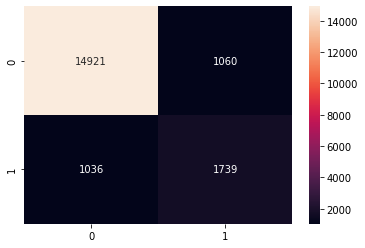

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf_matrix = confusion_matrix(y_test,predictions)  
sb.heatmap(cf_matrix, annot=True, fmt='g')

In [ ]:
model.evaluate(X_test,y_test)

587/587 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8706


[0.302734375, 0.8706014156341553]

NN Model with Tuning, Smote


---



In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_train_smote = np.asarray(X_train_smote).astype('float32')
# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 32660, 1: 32660})


In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow import keras
import keras_tuner as kt

def model_builder(hp):
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  model.add(layers.Input(shape=(46,)))
  hp_units1 = hp.Int('units1', min_value=128, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=128, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=128, step=32)
  model.add(layers.Dense(units=hp_units1, activation='relu'))
  model.add(layers.Dense(units=hp_units2,activation='relu'))
  model.add(layers.Dense(units=hp_units3,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train_smote, y_train_smote, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 01m 03s]
val_accuracy: 0.8818891644477844

Best val_accuracy So Far: 0.9579761028289795
Total elapsed time: 00h 22m 00s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_smote, y_train_smote, epochs=50, validation_split=0.2)

Epoch 1/50
1633/1633 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8460 - val_loss: 0.3555 - val_accuracy: 0.8414
Epoch 2/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.3250 - accuracy: 0.8626 - val_loss: 0.5303 - val_accuracy: 0.7815
Epoch 3/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8729 - val_loss: 0.4527 - val_accuracy: 0.8020
Epoch 4/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.2859 - accuracy: 0.8801 - val_loss: 0.3276 - val_accuracy: 0.8612
Epoch 5/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.8859 - val_loss: 0.3126 - val_accuracy: 0.8923
Epoch 6/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.8922 - val_loss: 0.2854 - val_accuracy: 0.8826
Epoch 7/50
1633/1633 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.8962 - val_loss: 0.2791 - val_accuracy:

In [ ]:
X_test = np.asarray(X_test).astype('float32')

In [ ]:
import pickle
filename = f'model_nn_w_tuning_SMOTE.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4222/{filename}", 'wb'))

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
loaded_clf = TabNetClassifier()
saved_filepath = f'/content/drive/MyDrive/BT4222/models/tabnet_model.zip'
loaded_clf.load_model(saved_filepath)

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
import pickle
filename = '/content/drive/MyDrive/BT4222/model_nn_w_tuning.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from tensorflow.keras import Sequential, layers


model = Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=(46,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4700      
                                                                 
 dense_9 (Dense)             (None, 64)                6464      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall'])

In [ ]:
X_train = np.asarray(X_train).astype('float32')

In [ ]:
history = model.fit(X_train, y_train,epochs=20,batch_size=64)

Epoch 1/20
595/595 [==============================] - 2s 2ms/step - loss: 0.3053 - recall: 0.3390
Epoch 2/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2691 - recall: 0.4543
Epoch 3/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2562 - recall: 0.4962
Epoch 4/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2540 - recall: 0.5108
Epoch 5/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2481 - recall: 0.5289
Epoch 6/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2457 - recall: 0.5309
Epoch 7/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2425 - recall: 0.5446
Epoch 8/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2430 - recall: 0.5422
Epoch 9/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2400 - recall: 0.5403
Epoch 10/20
595/595 [==============================] - 1s 2ms/step - loss: 0.2399 - recall: 0.5516
Epoch 11/20
595/595

In [ ]:
X_test = np.asarray(X_test).astype('float32')

In [ ]:
model.evaluate(X_test,y_test)

587/587 [==============================] - 1s 2ms/step - loss: 0.2413 - recall: 0.5016


[0.2412615716457367, 0.5016216039657593]

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

587/587 [==============================] - 1s 1ms/step


In [ ]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score,recall_score,accuracy_score,roc_auc_score,precision_score
y_test_formatted = y_test.to_numpy().astype('int64')
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(f"Accuracy: {accuracy_score(y_test,predictions)}")
print(f"Precision: {precision_score(y_test,predictions)}")
print(f"Recall: {recall_score(y_test,predictions)}")
print(f"F1-score: {f1_score(y_test,predictions)}")

0.9013115802943058
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15981
           1       0.75      0.50      0.60      2775

    accuracy                           0.90     18756
   macro avg       0.83      0.74      0.77     18756
weighted avg       0.89      0.90      0.89     18756

Accuracy: 0.9013115802943058
Precision: 0.7483870967741936
Recall: 0.5016216216216216
F1-score: 0.6006472491909386


In [ ]:
import pickle
filename = '/content/drive/MyDrive/BT4222/model_nn_no_SMOTE.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from torchvision import transforms

In [ ]:
X_train_formatted = X_train_smote.astype('float64')
y_train_formatted = y_train_smote.astype('int64')

In [ ]:
from sklearn.model_selection import train_test_split
# X_train_formatted, X_val_formatted, y_train_formatted, y_val_formatted = train_test_split(X_train_formatted,y_train_formatted,random_state=42,test_size = 0.2)
# X_train_formatted_0, X_val_formatted_0, y_train_formatted_0, y_val_formatted_0 = train_test_split(X_train_formatted_0,y_train_formatted_0,random_state=42,test_size = 0.2)
X_train_formatted, X_val_formatted, y_train_formatted, y_val_formatted = train_test_split(X_train_smote, y_train_smote,random_state=42,test_size = 0.2)

In [ ]:
clf = TabNetClassifier()
clf.fit(X_train_formatted, y_train_formatted,
    eval_set=[(X_train_formatted, y_train_formatted), (X_val_formatted, y_val_formatted)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    )

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.53064 | train_accuracy: 0.61981 | valid_accuracy: 0.62232 |  0:00:03s
epoch 1  | loss: 0.43173 | train_accuracy: 0.74971 | valid_accuracy: 0.74648 |  0:00:06s
epoch 2  | loss: 0.39033 | train_accuracy: 0.80823 | valid_accuracy: 0.80772 |  0:00:09s
epoch 3  | loss: 0.36954 | train_accuracy: 0.79436 | valid_accuracy: 0.7908  |  0:00:12s
epoch 4  | loss: 0.35571 | train_accuracy: 0.81271 | valid_accuracy: 0.8133  |  0:00:15s
epoch 5  | loss: 0.34833 | train_accuracy: 0.81395 | valid_accuracy: 0.81422 |  0:00:21s
epoch 6  | loss: 0.34626 | train_accuracy: 0.81156 | valid_accuracy: 0.8107  |  0:00:25s
epoch 7  | loss: 0.34514 | train_accuracy: 0.83732 | valid_accuracy: 0.83581 |  0:00:28s
epoch 8  | loss: 0.34184 | train_accuracy: 0.84274 | valid_accuracy: 0.83979 |  0:00:31s
epoch 9  | loss: 0.34072 | train_accuracy: 0.85736 | valid_accuracy: 0.8587  |  0:00:35s
epoch 10 | loss: 0.33464 | train_accuracy: 0.86237 | valid_accuracy: 0.86252 |  0:00:38s
epoch 11 | loss: 0.33

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score,recall_score,accuracy_score,roc_auc_score,precision_score
y_test_formatted = y_test.to_numpy().astype('int64')
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))
print(f"Accuracy: {accuracy_score(y_test,preds)}")
print(f"Precision: {precision_score(y_test,preds)}")
print(f"Recall: {recall_score(y_test,preds)}")
print(f"F1-score: {f1_score(y_test,preds)}")

0.858765195137556
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     15981
           1       0.51      0.80      0.63      2775

    accuracy                           0.86     18756
   macro avg       0.74      0.84      0.77     18756
weighted avg       0.90      0.86      0.87     18756

Accuracy: 0.858765195137556
Precision: 0.5145228215767634
Recall: 0.8043243243243243
F1-score: 0.6275832981864192


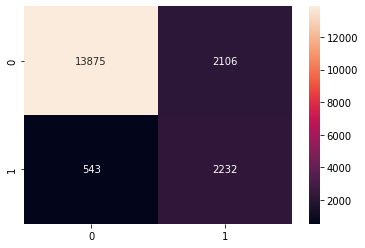

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf_matrix = confusion_matrix(y_test_formatted,preds)  
sb.heatmap(cf_matrix, annot=True, fmt='g')

In [ ]:
import pickle
filename = '/content/drive/MyDrive/BT4222/model_tabnet_SMOTE.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
saving_path_name = "/content/drive/MyDrive/BT4222/tabnet_model_SMOTE"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at /content/drive/MyDrive/BT4222/tabnet_model_SMOTE.zip
